Training eines Softmax Classifiers mit TensorFlow

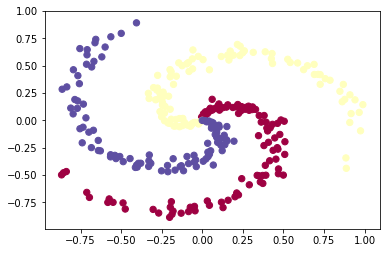

In [17]:
#!/usr/bin/env python

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [18]:
epochs = 1000
lr = 0.01

X_vals = np.c_[np.ones((3*N,1)),X]
y_vals = y


X = tf.placeholder(tf.float32, shape=(None,3))
Y = tf.placeholder(tf.int32, shape=(None))

w = tf.Variable(tf.random_uniform([3,3], -1.0, 1.0),name="w" )


mse = tf.reduce_sum(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=tf.matmul(X,w), labels=Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(mse)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

for i in range(epochs+1):
    #if i % 10 == 0:
        #print(i)
        #print(sess.run(w))
    sess.run(optimizer,feed_dict={X: X_vals, Y: y_vals })

training accuracy: 0.52
(10000, 3)
(10000,)


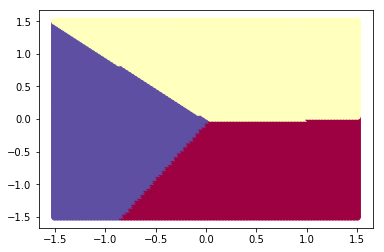

In [19]:
# Calculate predicted classes
probas = sess.run(tf.nn.softmax(sess.run(tf.matmul(X,w),feed_dict={X: X_vals, Y: y_vals })))
pred_class = np.argmax(probas,axis=1)
print('training accuracy: %.2f' % (np.mean(pred_class == y)))

# Plot the boundaries
S=100
X_p,Y_p = np.meshgrid(np.linspace(-1.5,1.5,S),np.linspace(-1.5,1.5,S))
X_p = X_p.reshape(S**2,1)
Y_p = Y_p.reshape(S**2,1)
X_p = np.hstack([np.ones((S**2,1)),X_p,Y_p])
probas  = sess.run(tf.nn.softmax(sess.run(tf.matmul(X,w),feed_dict={X: X_p })))
predicted_class = np.argmax(probas, axis=1)
print(X_p.shape)
print(predicted_class.shape)
plt.scatter(X_p[:, 1], X_p[:, 2], c=predicted_class, s=40, cmap=plt.cm.Spectral)
plt.show()